In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset as ds
from torchvision import transforms as tf


In [2]:
class MLP(nn.Module):
    def __init__(self, inp_size, h_size, num_classes): # input size,hidden size, number of class
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(inp_size, h_size)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(h_size, h_size)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(h_size, num_classes)

    def forward(self, x):
        outp = x.view(x.size(0), -1)
        outp = self.layer1(outp)
        outp = self.relu1(outp)
        outp = self.layer2(outp)
        outp = self.relu2(outp)
        outp = self.layer3(outp)
        return outp

In [3]:
class CustomDataset(ds):
    def __init__(self, img_names, labels, transform=None):
        self.img_names = img_names
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img = self.img_names[idx]
        label = self.labels[idx]
        image = Image.open(img).convert('L')
        if self.transform:
            image = self.transform(image)
        return image, label

In [4]:
w = 512
h = 461
inp_size = 1 * h * w
h_size = 256
num_classes = 3
model = MLP(inp_size, h_size, num_classes)

In [5]:
labels = [0, 1, 2]
img_names = ["Q5_1.png", "Q5_2.png", "Q5_3.png"]


In [6]:
transformer = tf.Compose([tf.Resize((w, h)),tf.ToTensor(),])
dataset = CustomDataset(img_names, labels, transform=transformer)
optimizer = optim.Adam(model.parameters(), lr=0.005)
losses = nn.CrossEntropyLoss()

In [7]:
epoch_num = 20
for epoch in range(epoch_num):
    all_loss = 0
    for image, target in dataset:
      optimizer.zero_grad()
      image = image.unsqueeze(0)
      outp = model(image)
      target = torch.tensor([target])
      loss = losses(outp, target)
      all_loss += loss.item()
      loss.backward()
      optimizer.step()

    print(f'Epoch {epoch + 1}, Loss: {all_loss}')

Epoch 1, Loss: 2670.288470864296
Epoch 2, Loss: 532.1484909057617
Epoch 3, Loss: 162.21987915039062
Epoch 4, Loss: 141.62476634923587
Epoch 5, Loss: 108.93720722198486
Epoch 6, Loss: 9.521000786917284
Epoch 7, Loss: 75.84670436367742
Epoch 8, Loss: 29.247398376464844
Epoch 9, Loss: 0.21228283567688777
Epoch 10, Loss: 0.0
Epoch 11, Loss: 0.00036006642039865255
Epoch 12, Loss: 6.05564855504781e-05
Epoch 13, Loss: 3.576278118089249e-07
Epoch 14, Loss: 3.576278118089249e-07
Epoch 15, Loss: 9.16677454370074e-05
Epoch 16, Loss: 0.0
Epoch 17, Loss: 0.0
Epoch 18, Loss: 103.77296781539917
Epoch 19, Loss: 11.498948335647555
Epoch 20, Loss: 0.0


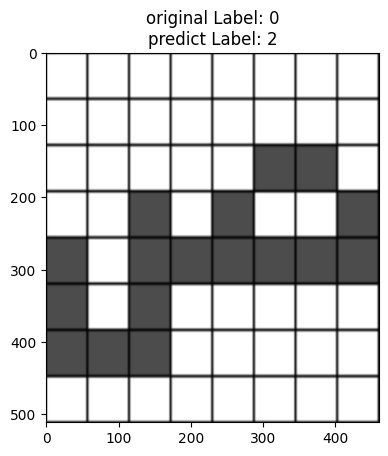

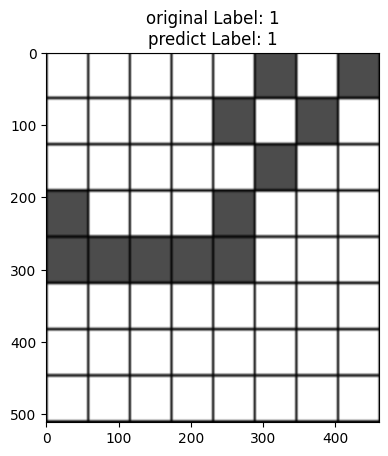

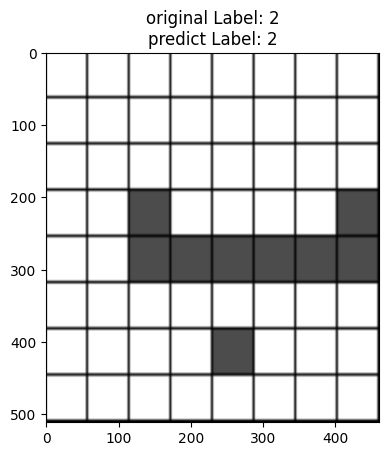

In [8]:
for i in range(len(img_names)):
    img = img_names[i]
    label = labels[i]
    image = Image.open(img).convert('L')
    image = transformer(image)

    outp = model(image.unsqueeze(0))
    pred_index = torch.argmax(outp, dim=1).item()
    pred_label = labels[pred_index]

    plt.imshow(image.view(w, h).numpy(), cmap='gray')
    plt.title(f"original Label: {label}\npredict Label: {pred_label}")
    plt.show()